In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from PIL import Image
from IPython.display import HTML

src_dir = os.path.join("../src")
sys.path.insert(0, src_dir)
from dataloader import VideoDataLoaderTF

In [2]:
def anim(a_batch, label):
    fig, ax = plt.subplots()
    anim_res = []
    imgs = a_batch.transpose((1,2,3,0))
    for i in range(imgs.shape[0]):
        ax.set_title(label)
        anim_res.append([ax.imshow(Image.fromarray(imgs[i]), animated=True)])
    return animation.ArtistAnimation(fig, anim_res, interval=100, blit=True, repeat_delay=1000)

In [3]:
batch_size = 6
ds = VideoDataLoaderTF("../data/Kinetics_small", 15, 10, num_clips=5, resolution=[300, 300], batch_size=batch_size, shuffle=True)

2021-07-20 21:44:24.807124: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
ds.getTrainLen()

30

X, frame_idx, y = dl.__getitem__(0)

In [5]:
train_ds, val_ds = ds.getSplitDataset()
iter_ds = iter(train_ds)
st_1 = next(iter_ds)
print(st_1)
X, frame_idx, y = st_1

2021-07-20 21:44:24.970071: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


(<tf.Tensor: shape=(6, 3, 15, 300, 300), dtype=float32, numpy=
array([[[[[-8.79814506e-01, -8.64464045e-01, -8.50232840e-01, ...,
           -3.46864939e-01, -3.56938690e-01, -3.61655772e-01],
          [-8.65522563e-01, -8.52335572e-01, -8.50232840e-01, ...,
           -3.46864939e-01, -3.56938690e-01, -3.70375156e-01],
          [-8.74585748e-01, -8.61873627e-01, -8.62433314e-01, ...,
           -3.26157779e-01, -3.32537830e-01, -3.62775087e-01],
          ...,
          [-1.00653601e+00, -9.98620868e-01, -9.53129053e-01, ...,
           -6.30489066e-02,  7.27548897e-02,  9.76194739e-02],
          [-9.99412358e-01, -9.90158916e-01, -9.50092554e-01, ...,
            1.03220806e-01,  7.10903257e-02, -5.55959307e-02],
          [-9.66960490e-01, -9.51610029e-01, -9.36259508e-01, ...,
            3.38590071e-02, -2.38612056e-01, -4.79502708e-01]],

         [[-8.06819797e-01, -8.40159118e-01, -8.84531617e-01, ...,
            1.21084929e-01,  1.26361653e-01,  1.05094843e-01],
          

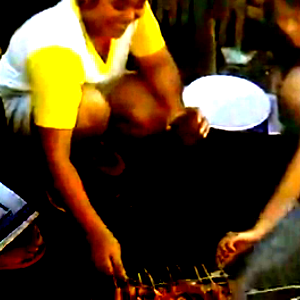

In [6]:
img = (X[0].numpy()*255+128).astype(np.uint8)
img = img.transpose((1,2,3,0))[0]
Image.fromarray(img)

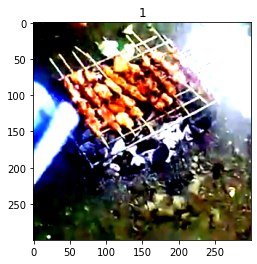

In [7]:
HTML(anim((X[0].numpy()*255+128).astype(np.uint8), y[0].numpy()).to_jshtml())